In [11]:
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
import numpy as np
import matplotlib.pyplot as plt
from torch.ao.quantization.utils import activation_dtype

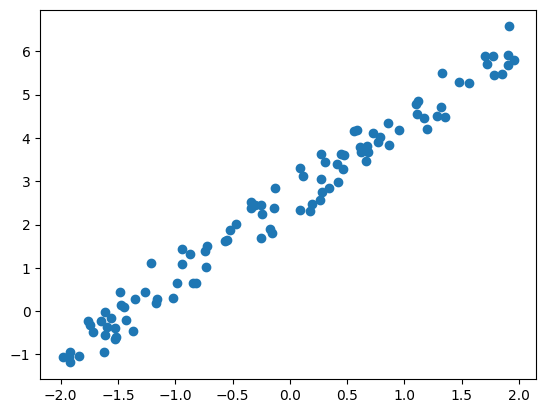

In [12]:
w, b = 1.8, 2.5
np.random.seed(0)
x = np.random.rand(100) * 4 - 2
noise = np.random.randn(100) / 3
y = w * x + b + noise

x = x.reshape(-1, 1)
x.shape, y.shape

plt.scatter(x, y)
plt.show()

In [13]:
mlp = MLPRegressor(
    hidden_layer_sizes=(1,),
    activation='identity',
    learning_rate_init=0.01,
    random_state=233,
)

In [14]:
mlp.fit(x, y)

,loss,'squared_error'
,hidden_layer_sizes,"(1,)"
,activation,'identity'
,solver,'adam'
,alpha,0.0001
,batch_size,'auto'
,learning_rate,'constant'
,learning_rate_init,0.01
,power_t,0.5
,max_iter,200
,shuffle,True


In [15]:
w1, w2 = mlp.coefs_

In [6]:
b1, b2 = mlp.intercepts_

In [7]:
y1 = w1*x +b1
y2 = w2*x +b2

y_t = y1*w2 +b2

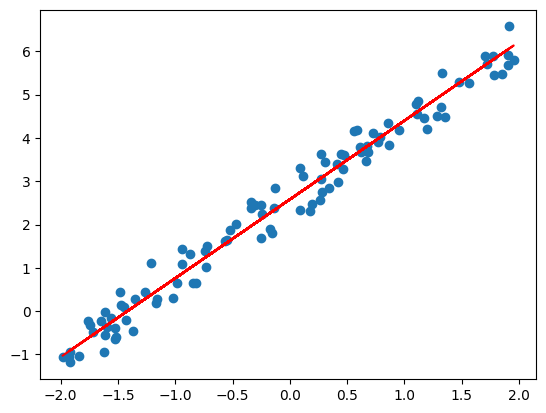

In [8]:
plt.scatter(x, y)
plt.plot(x, y_t, color='red')

In [9]:
w1, w2, b1, b2 = np.random.randn(4)
y_real = y.reshape(-1,1)

In [10]:
lr = 0.01
for i in range(100):
    y1 = w1 * x + b1
    y_pred = w2 * y1 + b2
    loss = ((y_real - y_pred)**2)/2

    dy = y_pred - y_real
    dy1 = dy * w2

    dw1 = np.mean(x * dy1)
    dw2 = np.mean(y1 * dy)
    db1 = np.mean(dy1)
    db2 = np.mean(dy)

    w1 -= lr * dw1
    w2 -= lr * dw2
    b1 -= lr * db1
    b2 -= lr * db2

print(w1, w2, b1, b2)

-0.7865961506365119 -2.281516347579787 -1.8052603505178628 -1.5557865752893039
